In [2]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

In [3]:
import cPickle as pickle

In [572]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

In [573]:
init_mean_vi = VI(gold, rhoana)[0]
init_median_vi = VI(gold, rhoana)[1]
init_vi_per_slice = VI(gold, rhoana)[2]

In [770]:
init_median_vi

0.4763612343909136

In [620]:
FP_USERS = []
GP_USERS = []
FP_EXPERTS = []
GP_EXPERTS = []
with open('/home/d/GPSTUDY/study.csv', 'r') as f:
    lines = f.readlines()
for l in lines[1:]:
    line = l.strip('\n').split(',')
    userid = line[3]
    method = line[4]
    if method == 'FP':
        if userid.startswith('E'):
            FP_EXPERTS.append(userid)
        else:
            FP_USERS.append(userid)
    elif method == 'GP':
        if userid.startswith('E'):
            GP_EXPERTS.append(userid)
        else:
            GP_USERS.append(userid)

No. users 10
Avg. correction time 4909.45155238
Avg. corrections 423.4
Avg. accepted 45.8


TypeError: 'NoneType' object is not iterable

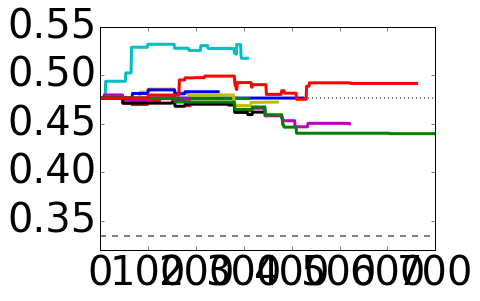

In [621]:
fp_vi_per_slice, fp_merge_vis, fp_split_vis = gp.Stats.analyze_users(FP_USERS, gold, rhoana, clampX=700,
                                                                    filename='/home/d/PAPERGFX/fpusers.pdf')

['S3', 'S28', 'S54', 'S53', 'S25', 'S35', 'S36', 'S51', 'S52', 'S200']

No. users 10
Avg. correction time 6243.34924225
Avg. corrections 353.4
Avg. accepted 106.9


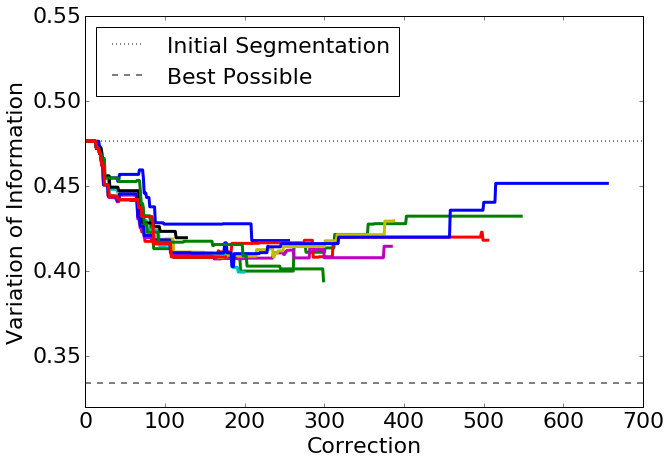

In [589]:
gp_vi_per_slice, gp_merge_vis, gp_split_vis = gp.Stats.analyze_users(GP_USERS, gold, rhoana, clampX=700,
                                                                    filename='/home/d/PAPERGFX/gpusers.pdf')

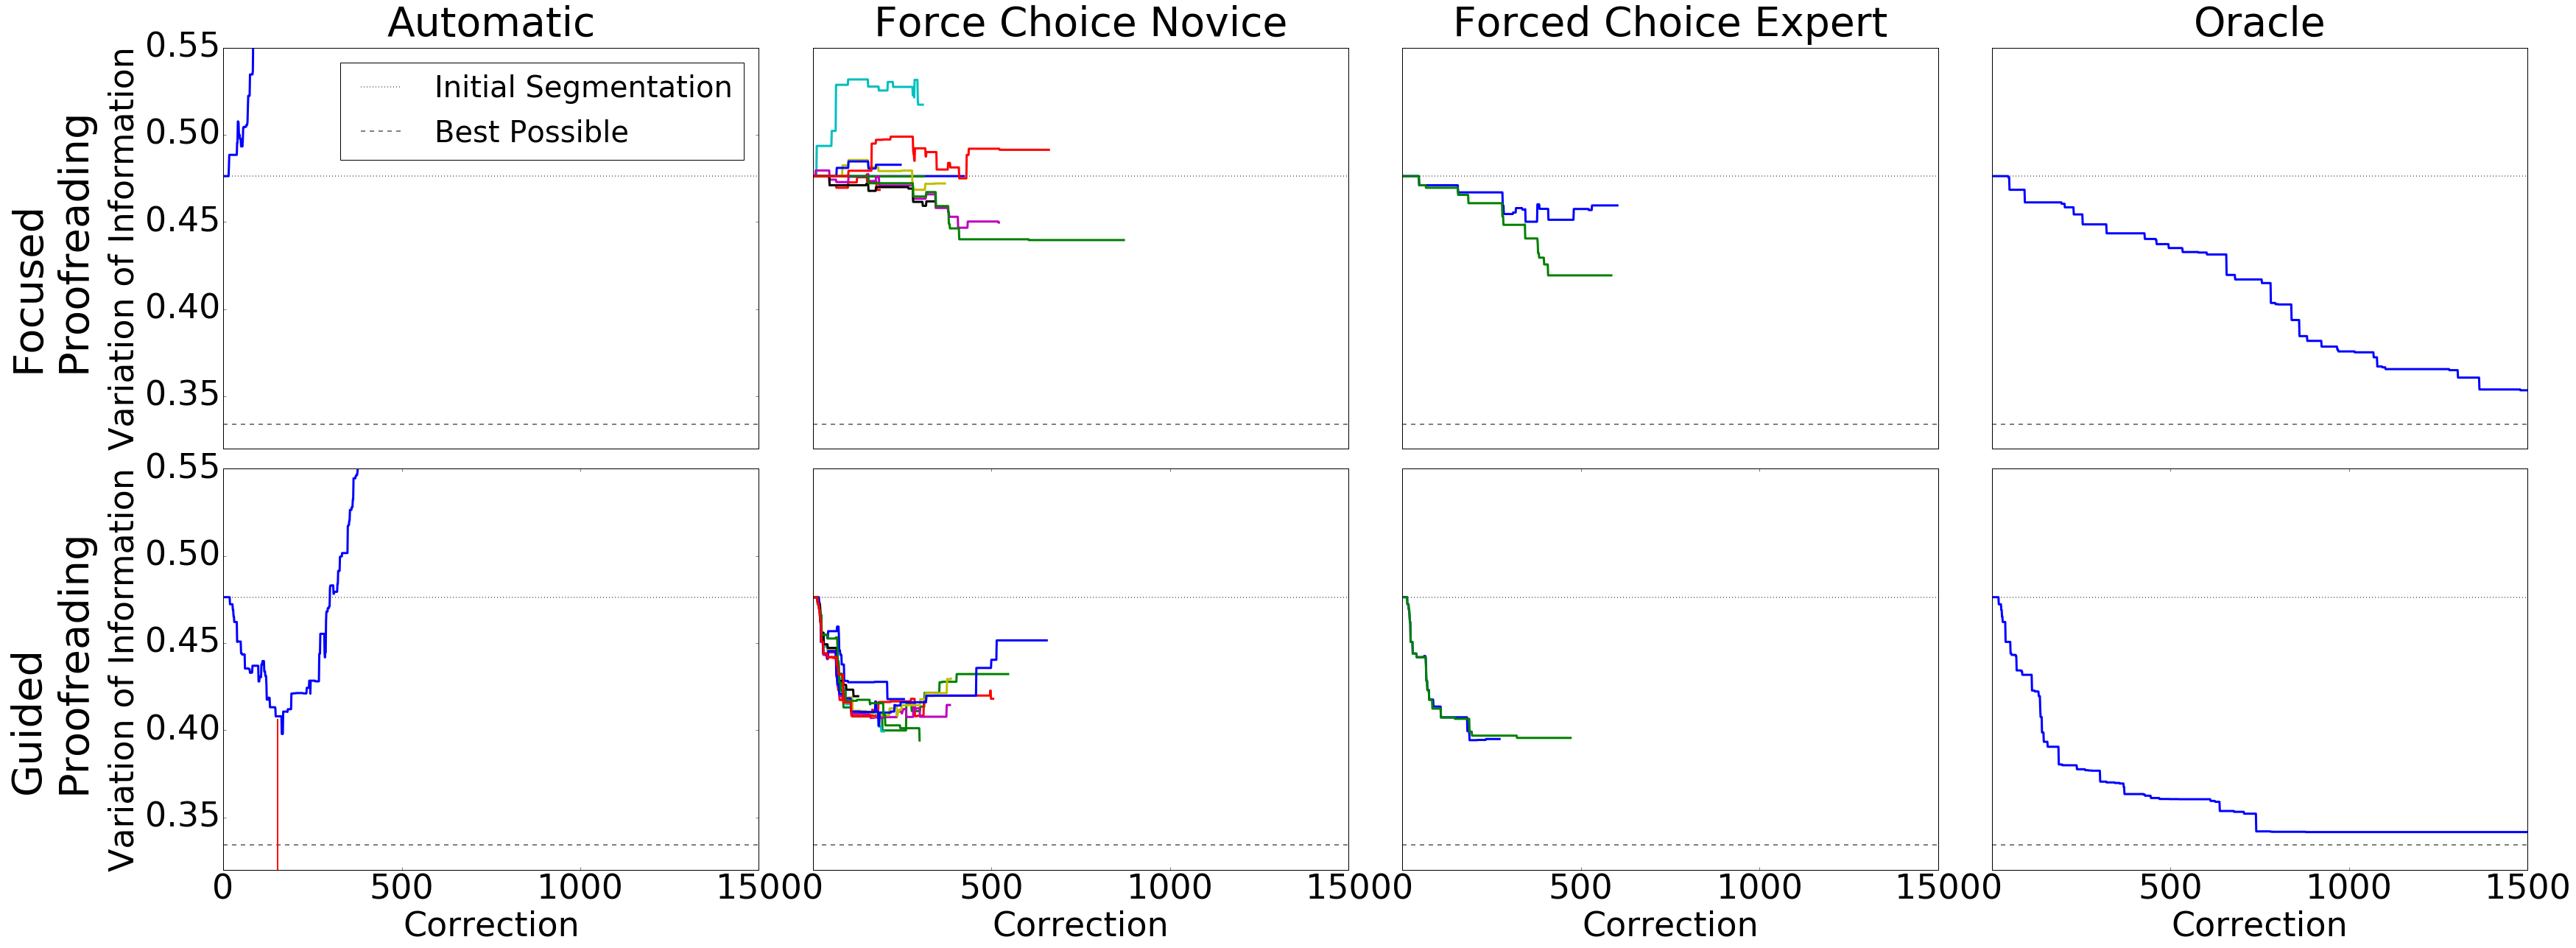

In [796]:
import matplotlib.gridspec as gridspec
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
fig = plt.figure(1, figsize=(60,20))
clamper=1500

# fig.suptitle('Focused Proofreading', y=1.05, fontsize=64, fontweight='bold')
gs = gridspec.GridSpec(2,5,width_ratios=[.2,1,1,1,1])
gs.update(wspace=0.12, hspace=0.05)
a = plt.subplot(gs[0])
a.axis('off')
plt.text(-.5, .85, 
         'Focused\nProofreading', 
         ha='left', va='top', rotation='90',
         fontsize=56, fontweight='normal')

plt.subplot(gs[1])
gp.Stats.analyze_users(['auto95FP_NEW'], gold, rhoana, returnplt=True, vilabel=True, hideYlabels=False, showlegend=True,clampX=clamper)
plt.title('Automatic', y=1.02)
plt.subplot(gs[2])
plt.title('Force Choice Novice', y=1.02)
gp.Stats.analyze_users(FP_USERS, gold, rhoana, returnplt=True,clampX=clamper)
plt.subplot(gs[3])
gp.Stats.analyze_users(FP_EXPERTS, gold, rhoana, returnplt=True,clampX=clamper)
plt.title('Forced Choice Expert', y=1.02)
plt.subplot(gs[4])
gp.Stats.analyze_users(['simuserFP_NEW'], gold, rhoana, returnplt=True,clampX=clamper)
plt.title('Oracle', y=1.02)
a = plt.subplot(gs[5])
a.axis('off')
plt.text(-.5, .85, 
         'Guided\nProofreading', 
         ha='left', va='top', rotation='90',
         fontsize=56, fontweight='normal')
plt.subplot(gs[6])

gp.Stats.analyze_users(['auto95GP_NEW'], gold, rhoana, hline=153,returnplt=True, vilabel=True,clampX=clamper,hideYlabels=False,clabel=True,hideXlabels=False)
plt.subplot(gs[7])
gp.Stats.analyze_users(GP_USERS, gold, rhoana, returnplt=True,clampX=clamper,hideXlabels=False,clabel=True)
plt.subplot(gs[8])
gp.Stats.analyze_users(GP_EXPERTS, gold, rhoana, returnplt=True,clampX=clamper,hideXlabels=False,clabel=True)
plt.subplot(gs[9])
gp.Stats.analyze_users(['simuserGP_NEW'], gold, rhoana, returnplt=True,clampX=clamper,hideXlabels=False,clabel=True)

# plt.tight_layout(pad=0.01, w_pad=0.01, h_pad=.5)

# gp.Stats.analyze_users(GP_USERS, gold, rhoana, clampX=700,
#                                                                     filename='/home/d/PAPERGFX/gpusers.pdf')
# plt.subplot(212)
# gp.Stats.analyze_users(GP_USERS, gold, rhoana, clampX=700,
#                                                                     filename='/home/d/PAPERGFX/gpusers.pdf')

plt.savefig('/home/d/PAPERGFX/ac4trails.pdf')

No. users 2
Avg. correction time 2827.76391799
Avg. corrections 593.5
Avg. accepted 65.5


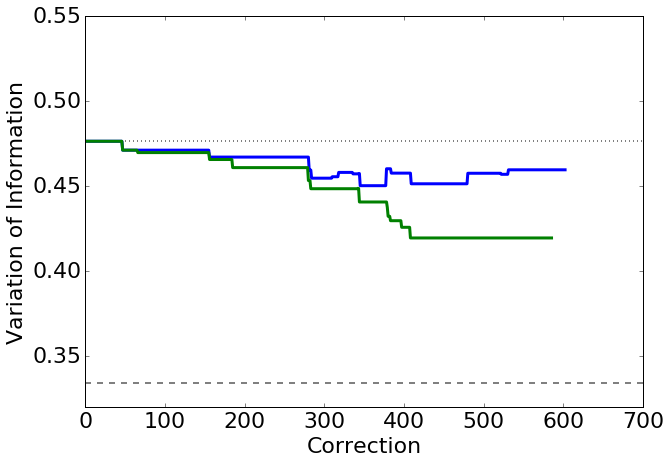

In [428]:
expert_fp_vi_per_slice, expert_fp_merge_vis, expert_fp_split_vis = gp.Stats.analyze_users(FP_EXPERTS, gold, rhoana, 
#                                                                                           oracle=['simuserFP'],
                                                                                          clampX=False,
                                                                                         filename='/home/d/PAPERGFX/fpexperts.pdf')


No. users 2
Avg. correction time 4960.00050347
Avg. corrections 371.5
Avg. accepted 90.0


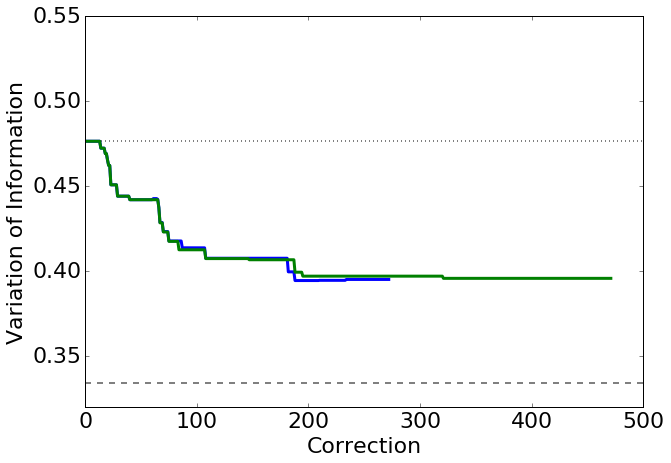

In [429]:
expert_gp_vi_per_slice, expert_gp_merge_vis, expert_gp_split_vis = gp.Stats.analyze_users(GP_EXPERTS, gold, rhoana,
                                                                                         filename='/home/d/PAPERGFX/gpexperts.pdf')

No. users 1
Avg. correction time 0.0
Avg. corrections 1769.0
Avg. accepted 248.0


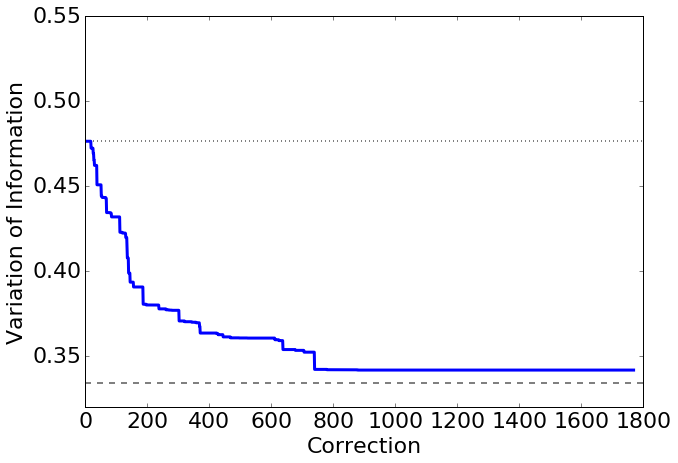

In [476]:
simuser_gp_vi_per_slice, simuser_gp_merge_vis, simuser_gp_split_vis = gp.Stats.analyze_users(['simuserGP_NEW'], gold, rhoana,
                                                                                            clampX=False,
                                                                                            filename='/home/d/PAPERGFX/gporacle.pdf')

No. users 1
Avg. correction time 0.0
Avg. corrections 1605.0
Avg. accepted 200.0


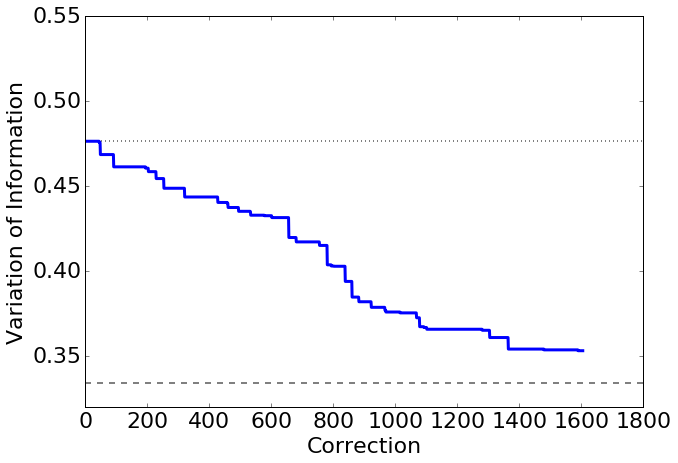

In [431]:
simuser_fp_vi_per_slice, simuser_fp_merge_vis, simuser_fp_split_vis = gp.Stats.analyze_users(['simuserFP_NEW'], gold, rhoana,
                                                                                            clampX=False,
                                                                                            filename='/home/d/PAPERGFX/fporacle.pdf')

No. users 1
Avg. correction time 0.0
Avg. corrections 551.0
Avg. accepted 551.0


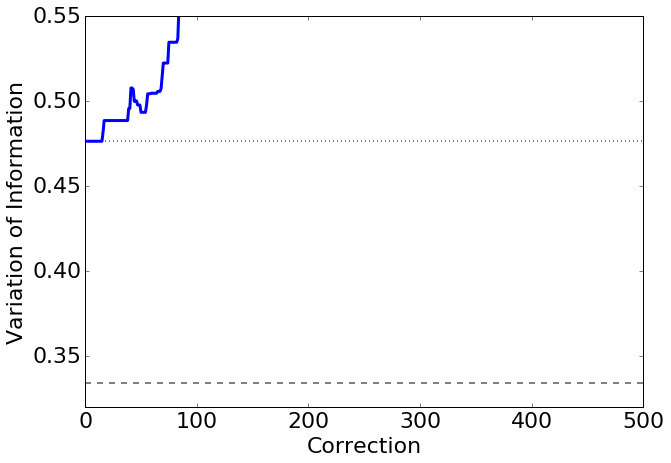

In [432]:
auto95_fp_vi_per_slice, auto95_fp_merge_vis, auto95_fp_split_vis = gp.Stats.analyze_users(['auto95FP_NEW'], gold, rhoana,
                                                                                         filename='/home/d/PAPERGFX/fpauto.pdf')

No. users 1
Avg. correction time 0.0
Avg. corrections 808.0
Avg. accepted 804.0


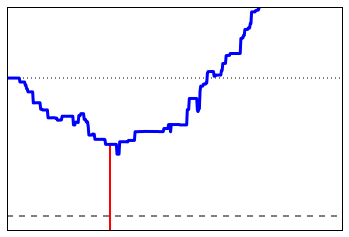

In [691]:
auto95_gp_vi_per_slice, auto95_gp_merge_vis, auto95_gp_split_vis, auto95_all_vis = gp.Stats.analyze_users(['auto95GP_NEW'], gold, rhoana,
                                                                                         filename='/home/d/PAPERGFX/gpauto.pdf',
                                                                                         hline=153,
                                                                                         )

No. users 1
Avg. correction time 0.0
Avg. corrections 101.0
Avg. accepted 101.0


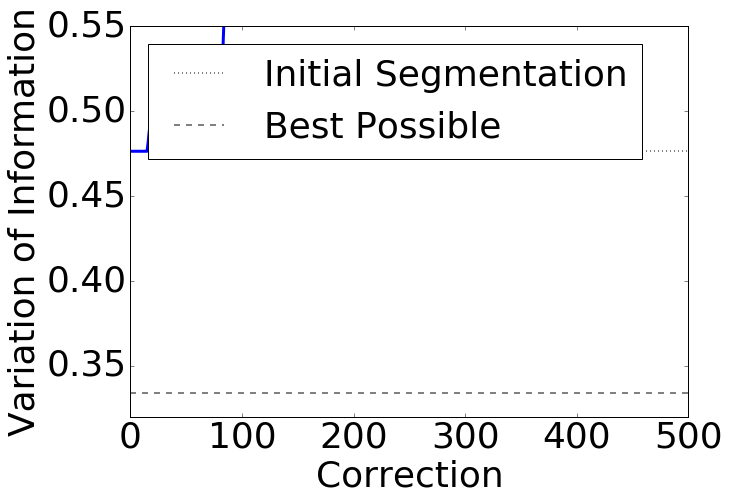

In [603]:
auto95_fp_t_vi_per_slice, auto95_fp_t_merge_vis, auto95_fp_t_split_vis = gp.Stats.analyze_users(['auto95FP_threshold_NEW'], gold, rhoana)

In [787]:
np.std(simuser_fp_vi_per_slice)

0.037173195046294773

In [788]:
np.std(simuser_gp_vi_per_slice)

0.030580564368912731

In [583]:
def boxplot(objects, data, clampY=True, filename=None):
#     plt.subplots()

    y_pos = range(1,len(objects)+1)

    fig = plt.figure(figsize=(10,7))
    plt.axhline(np.median(data[0]), color='gray', linewidth=2, linestyle=':')
    plt.axhline(y=0.33414926373414477, color='gray', linestyle='--', linewidth=2, label='Best Possible')

    bp = plt.boxplot(data)
    plt.setp(bp['whiskers'],linewidth=3,linestyle='-',color='black')
    plt.setp(bp['fliers'],linewidth=3)
    plt.setp(bp['means'],linewidth=3)
    plt.setp(bp['medians'],linewidth=3
            ,color='black')
    plt.setp(bp['boxes'],linewidth=3,color='black')
    plt.setp(bp['caps'],linewidth=3)

    plt.ylabel('Variation of Information')
    if clampY:
        plt.ylim([0.3,0.7])
#     plt.yticks(np.arange(min(x), max(x)+1, 1.0))
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 22}

    plt.rc('font', **font)
    plt.xticks(y_pos, objects)
    if filename:
        plt.savefig(filename)
    plt.show()

In [592]:
    dojo_best_user = [0.3764043166,
                      0.3516472472,
                      0.4079547444,
                      0.4530306854,
                      0.489459557,
                      0.4783714198,
                      0.4691797846,
                      0.4852945057,
                      0.4989719721,
                      0.4631116968]
    dojo_avg_user = [0.4731860794,
                     0.4412143846,
                     0.4645102603,
                     0.4790327986,
                     0.5483534853,
                     0.5209529753,
                     0.5614397773,
                     0.5669964498,
                     0.6037881064,
                     0.5986637472]    

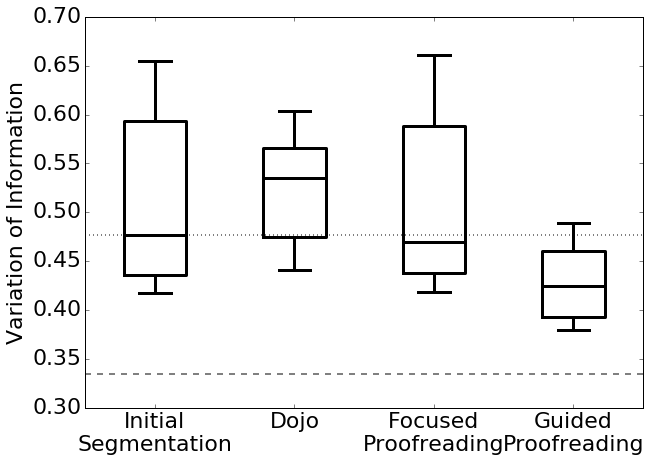

In [595]:
objects = ['Initial\nSegmentation', 'Dojo', 'Focused\nProofreading', 'Guided\nProofreading']
data = [init_vi_per_slice, dojo_avg_user, fp_vi_per_slice, gp_vi_per_slice]
boxplot(objects, data)

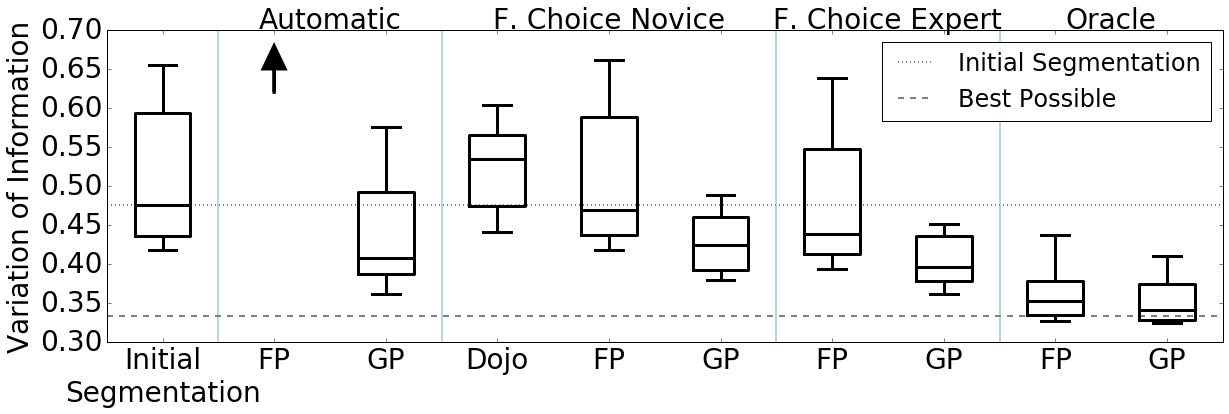

In [769]:
def bigboxplot(objects, data, clampY=True, filename=None):
#     plt.subplots()

    y_pos = range(1,len(objects)+1)

    fig = plt.figure(figsize=(20,14))
    ax = plt.gca()
    ax.axvline(x=1.5,ymax=1, color='lightblue', linewidth=2)
    ax.axvline(x=3.5,ymax=1, color='lightblue', linewidth=2)    
    ax.axvline(x=6.5,ymax=1, color='lightblue', linewidth=2)    
    ax.axvline(x=8.5,ymax=1, color='lightblue', linewidth=2)    
    plt.axhline(np.median(data[0]), color='gray', linewidth=2, linestyle=':', label='Initial Segmentation')
    plt.axhline(y=0.33414926373414477, color='gray', linestyle='--', linewidth=2, label='Best Possible')

    bp = plt.boxplot(data)
    plt.setp(bp['whiskers'],linewidth=3,linestyle='-',color='black')
    plt.setp(bp['fliers'],linewidth=3)
    plt.setp(bp['means'],linewidth=3)
    plt.setp(bp['medians'],linewidth=3
            ,color='black')
    plt.setp(bp['boxes'],linewidth=3,color='black')
    plt.setp(bp['caps'],linewidth=3)

    plt.text(2.5, .73, 
             'Automatic', 
             ha='center', va='top',
             fontsize=28, fontweight='normal')    
    plt.text(5, .73, 
             'F. Choice Novice', 
             ha='center', va='top',
             fontsize=28, fontweight='normal')   
    
    plt.text(7.5, .73, 
             'F. Choice Expert', 
             ha='center', va='top',
             fontsize=28, fontweight='normal')   
    

    plt.text(9.5, .73, 
             'Oracle', 
             ha='center', va='top',
             fontsize=28, fontweight='normal')    
    
    ax.set_aspect(7)
    ax.arrow(2, .62, 0, .03, head_width=0.2, head_length=0.03, fc='k', ec='k', linewidth=3)
    legend = ax.legend(loc='upper right')
    plt.ylabel('Variation of Information')
    if clampY:
        plt.ylim([0.3,0.7])
#     plt.yticks(np.arange(min(x), max(x)+1, 1.0))
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 28}

    plt.rc('font', **font)
    plt.rc('legend',**{'fontsize':24})
    plt.xticks(y_pos, objects)
    if filename:
        plt.savefig(filename)
        
    plt.savefig('/home/d/PAPERGFX/ac4boxplot.pdf')
    plt.show()

objects = ['Initial\nSegmentation',
           'Focused\nProofreading',
           'Guided\nProofreading',
           'Dojo',
           'Focused\nProofreading',
           'Guided\nProofreading',
           'Focused\nProofreading',
           'Guided\nProofreading',           
           'Focused\nProofreading',
           'Guided\nProofreading']
objects = ['Initial\nSegmentation',
           'FP',
           'GP',
           'Dojo',
           'FP',
           'GP',
           'FP',
           'GP',           
           'FP',
           'GP']

data = [init_vi_per_slice, 
        [], 
        auto95_all_vis[0][153], 
        dojo_avg_user, 
        fp_vi_per_slice, 
        gp_vi_per_slice,
        expert_fp_vi_per_slice,
        expert_gp_vi_per_slice,
       simuser_fp_vi_per_slice,
       simuser_gp_vi_per_slice]
bigboxplot(objects, data)

In [782]:
np.std(expert_gp_vi_per_slice)

0.031913211956737381

In [776]:
np.median(gp_vi_per_slice)

0.42417503622005071

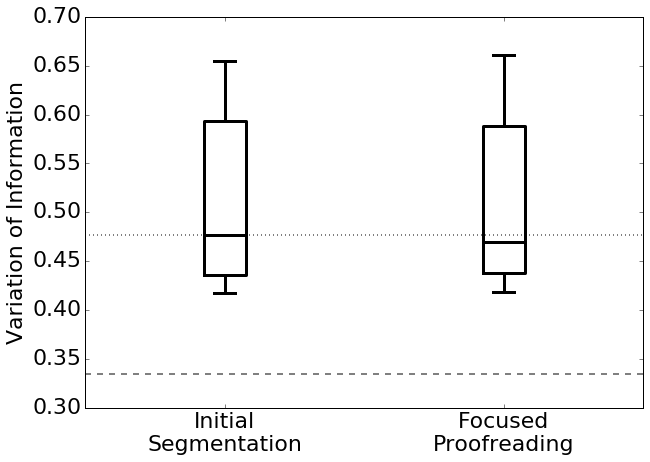

In [597]:
objects = ['Initial\nSegmentation', 'Focused\nProofreading']
data = [init_vi_per_slice, fp_vi_per_slice]
boxplot(objects, data, filename='/home/d/PAPERGFX/fc_fp_ac4.pdf')

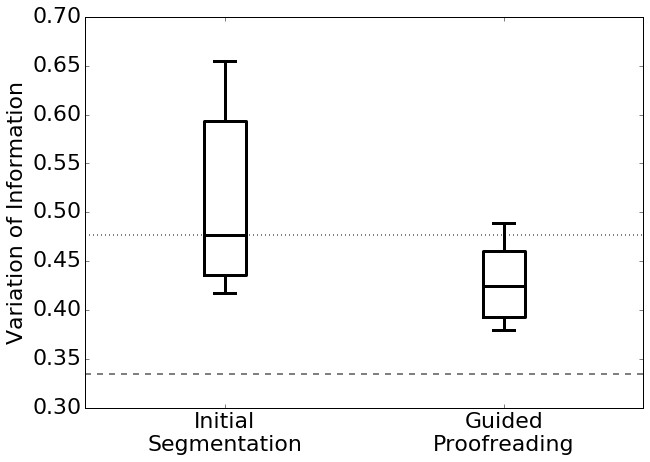

In [437]:
objects = ['Initial\nSegmentation', 'Guided\nProofreading']
data = [init_vi_per_slice, gp_vi_per_slice]
boxplot(objects, data)

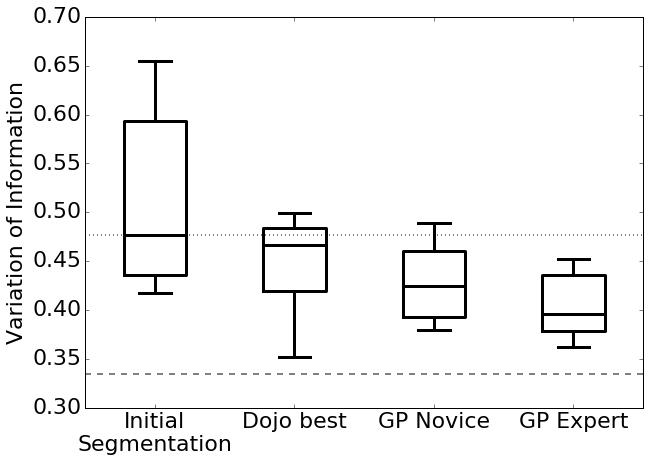

In [596]:
objects = ['Initial\nSegmentation', 'Dojo best', 'GP Novice', 'GP Expert']
data = [init_vi_per_slice, dojo_best_user, gp_vi_per_slice, expert_gp_vi_per_slice]
boxplot(objects, data, filename='/home/d/PAPERGFX/gp_novice_expert_box.pdf')

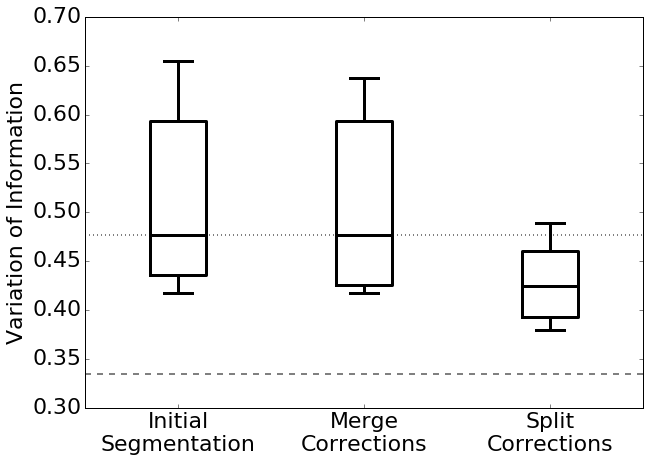

In [585]:
averages_gp_merge_vis = [0]*10#len(gp_merge_vis)
for u in range(len(gp_merge_vis)):
    for z in range(10):
        averages_gp_merge_vis[z] += gp_merge_vis[u][z]
for z in range(10):
    averages_gp_merge_vis[z] /= len(gp_merge_vis)
averages_gp_split_vis = [0]*10#len(gp_merge_vis)
for u in range(len(gp_split_vis)):
    for z in range(10):
        averages_gp_split_vis[z] += gp_split_vis[u][z]
for z in range(10):
    averages_gp_split_vis[z] /= len(gp_split_vis)
objects = ['Initial\nSegmentation', 'Merge\nCorrections', 'Split\nCorrections']
data = [init_vi_per_slice, averages_gp_merge_vis, averages_gp_split_vis]
boxplot(objects, data, filename='/home/d/PAPERGFX/gp_merge_split_novice_box.pdf')

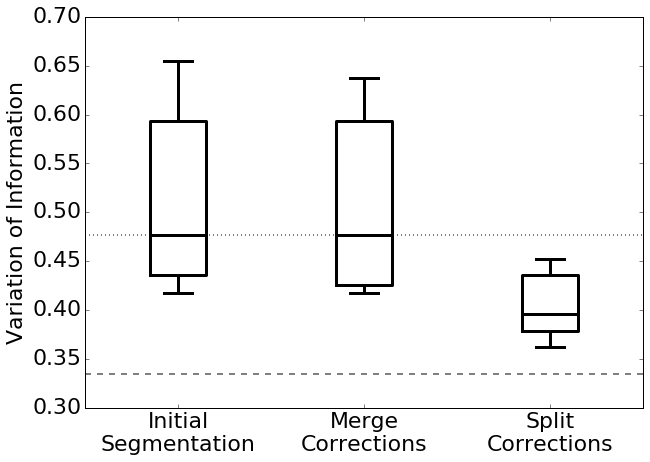

In [586]:
averages_gp_merge_vis = [0]*10#len(gp_merge_vis)
for u in range(len(expert_gp_merge_vis)):
    for z in range(10):
        averages_gp_merge_vis[z] += expert_gp_merge_vis[u][z]
for z in range(10):
    averages_gp_merge_vis[z] /= len(expert_gp_merge_vis)
averages_gp_split_vis = [0]*10#len(gp_merge_vis)
for u in range(len(expert_gp_split_vis)):
    for z in range(10):
        averages_gp_split_vis[z] += expert_gp_split_vis[u][z]
for z in range(10):
    averages_gp_split_vis[z] /= len(expert_gp_split_vis)
objects = ['Initial\nSegmentation', 'Merge\nCorrections', 'Split\nCorrections']
data = [init_vi_per_slice, averages_gp_merge_vis, averages_gp_split_vis]
boxplot(objects, data, filename='/home/d/PAPERGFX/gp_merge_split_expert_box.pdf')

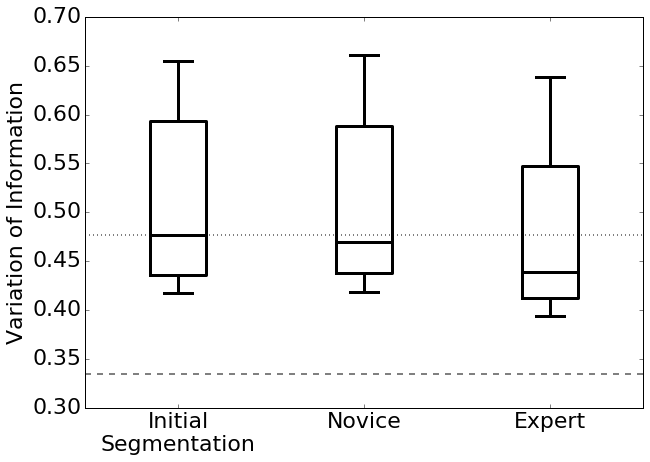

In [439]:
objects = ['Initial\nSegmentation', 'Novice', 'Expert']
data = [init_vi_per_slice, fp_vi_per_slice, expert_fp_vi_per_slice]
boxplot(objects, data)

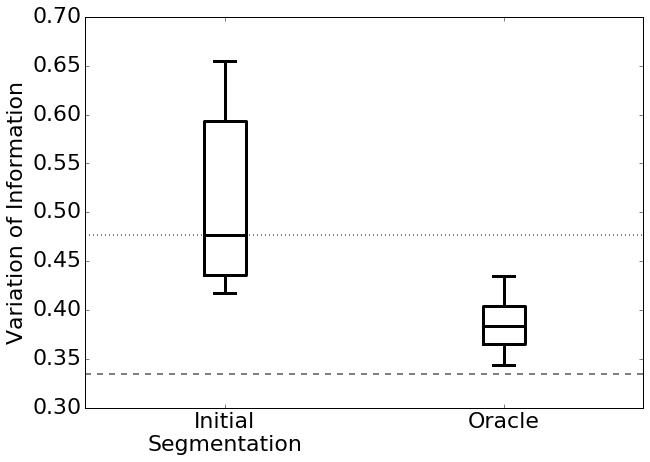

In [445]:
objects = ['Initial\nSegmentation', 'Oracle']
data = [init_vi_per_slice, simuser_gp_vi_per_slice]
boxplot(objects, data)

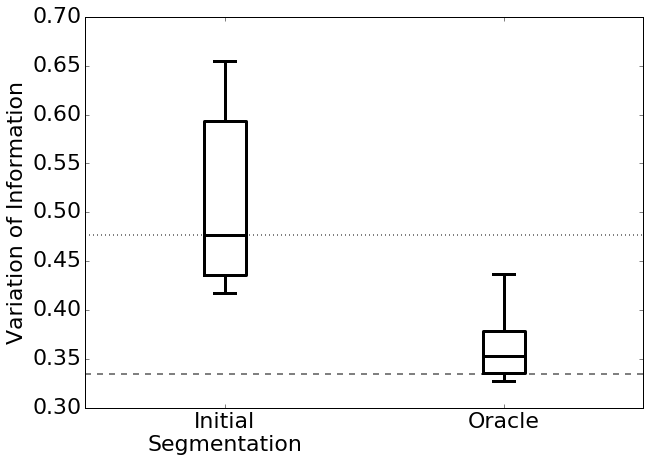

In [444]:
objects = ['Initial\nSegmentation', 'Oracle']
data = [init_vi_per_slice, simuser_fp_vi_per_slice]
boxplot(objects, data)

In [798]:
np.std(auto95_fp_t_vi_per_slice)

0.49553943958908797

In [800]:
np.median(cyl_simuser_fp_vi_per_slice)

0.0

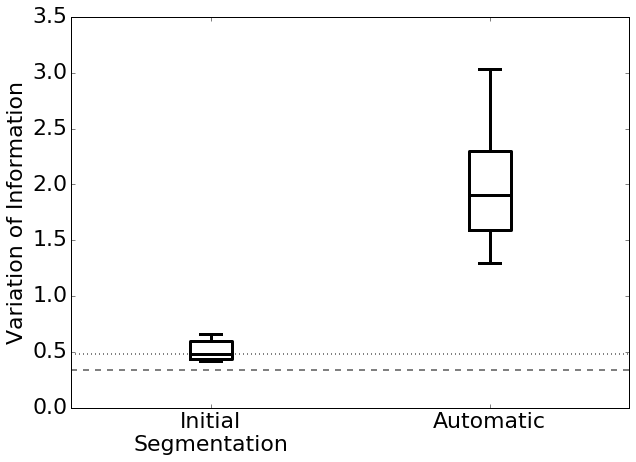

In [461]:
objects = ['Initial\nSegmentation', 'Automatic']
data = [init_vi_per_slice, auto95_fp_t_vi_per_slice]
boxplot(objects, data, False)

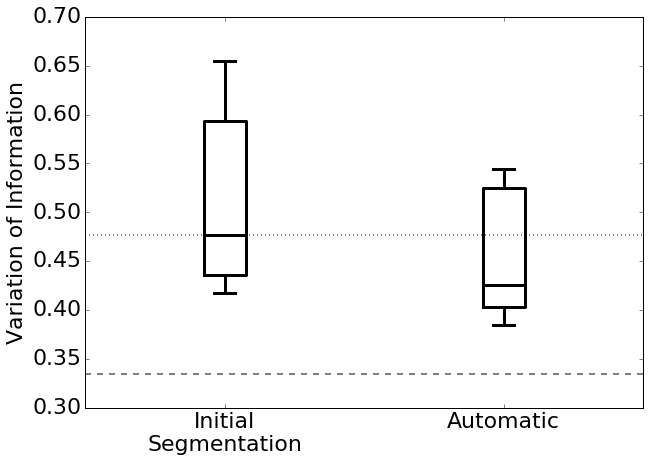

In [471]:
with open('/home/d/GPSTUDY/auto95GP_threshold_NEW/correction_vis.p','rb') as f:
    vi_ = pickle.load(f)
objects = ['Initial\nSegmentation', 'Automatic']
data = [init_vi_per_slice, vi_[-1]]
boxplot(objects, data, False)

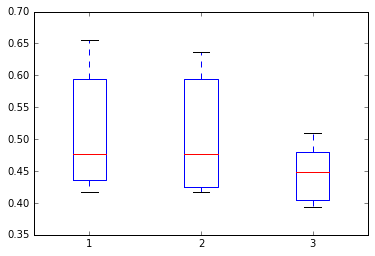

In [178]:
after_merge_after_split = plt.boxplot([init_vi_per_slice, averages_gp_merge_vis, averages_gp_split_vis])

In [546]:
import glob, os
import mahotas as mh
c_gold = []
c_rhoana = []
for z in range(250,300):
    path = '/home/d/data/cylinderNEW/'
    gold = sorted(glob.glob(os.path.join(path, 'gold', '*'+str(z)+'.png')))
    rhoana = sorted(glob.glob(os.path.join(path, 'rhoana', '*'+str(z)+'.png')))
    mask = sorted(glob.glob(os.path.join(path, 'mask', '*'+str(z)+'.png')))   
    mask = mh.imread(mask[0]).astype(np.bool)
    gold = mh.imread(gold[0])
    rhoana = mh.imread(rhoana[0])
    

    #convert ids from rgb to single channel
    rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint64)
    rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]
    gold_single = np.zeros((gold.shape[0], gold.shape[1]), dtype=np.uint64)
    gold_single[:, :] = gold[:,:,0]*256*256 + gold[:,:,1]*256 + gold[:,:,2]

    # relabel the segmentations
    gold_single = gp.Util.relabel(gold_single)
    rhoana_single = gp.Util.relabel(rhoana_single)
    
    
    #mask the rhoana output
    rhoana_single[mask==0] = 0
    
    c_gold.append(gold_single)
    c_rhoana.append(rhoana_single)
    

In [ ]:
cyl_auto95_fp_vi_per_slice, cyl_auto95_fp_merge_vis, cyl_auto95_fp_split_vis = gp.Stats.analyze_users(['auto95FP_NEW'], c_gold, c_rhoana,
                                                                                         filename='/home/d/PAPERGFX/cylinder_fpauto.pdf',
                                                                                         DATADIR='/home/d/CYLINDERSTUDY/',
                                                                                         data='cyl',
                                                                                         clampX=None, clampY=None,
                                                                                         skipoutput=True)

In [ ]:
cyl_simuser_fp_vi_per_slice, cyl_simuser_fp_merge_vis, cyl_simuser_fp_split_vis = gp.Stats.analyze_users(['simuserFP_NEW'], c_gold, c_rhoana,
                                                                                         filename='/home/d/PAPERGFX/cylinder_fpsimuser.pdf',
                                                                                         DATADIR='/home/d/CYLINDERSTUDY/',
                                                                                         data='cyl',
                                                                                         clampX=None, clampY=None,
                                                                                         skipoutput=True)

In [801]:
len(cyl_simuser_fp_split_vis)

0

No. users 1
Avg. correction time 0.0
Avg. corrections 10817.0
Avg. accepted 10702.0


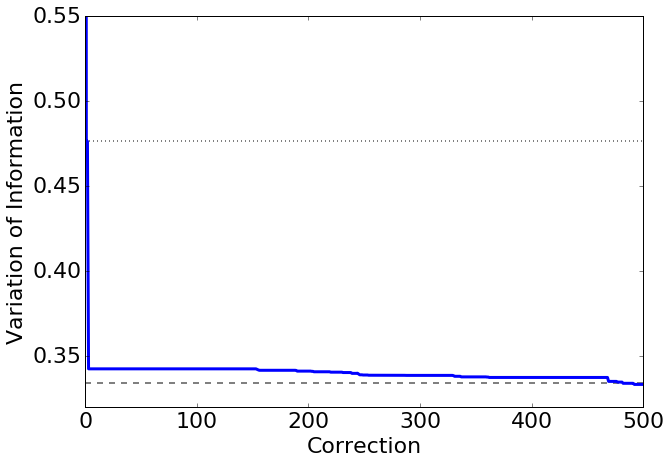

AssertionError: 

In [489]:
auto95_gp_vi_per_slice, auto95_gp_merge_vis, auto95_gp_split_vis = gp.Stats.analyze_users(['auto00GP_NEW'], c_gold, c_rhoana,
                                                                                         filename='/home/d/PAPERGFX/cylinder_gpauto.pdf',
                                                                                         DATADIR='/home/d/CYLINDERSTUDY/')

No. users 1
Avg. correction time 0.0
Avg. corrections 27135.0
Avg. accepted 2648.0


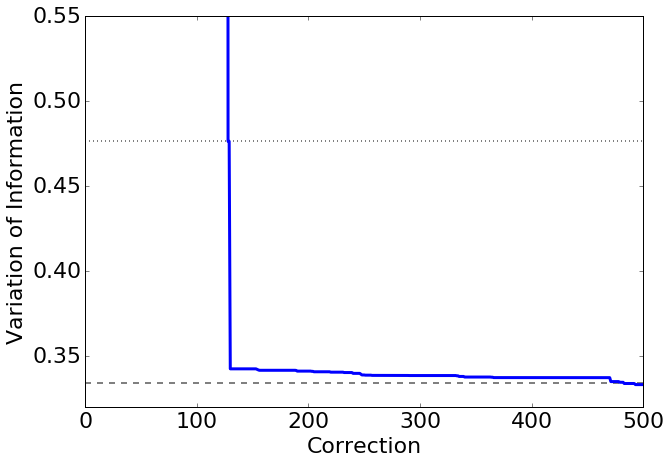

AssertionError: 

In [490]:
simuser_gp_vi_per_slice, simuser_gp_merge_vis, simuser_gp_split_vis = gp.Stats.analyze_users(['simuserGP_NEW'], c_gold, c_rhoana,
                                                                                         filename='/home/d/PAPERGFX/cylinder_fpauto.pdf',
                                                                                         DATADIR='/home/d/CYLINDERSTUDY/')

In [547]:
c_gold[0].shape

(2048, 2048)

In [792]:
np.std(dojo_avg_user)

0.055459279955864825

In [530]:

DATADIR='/home/d/CYLINDERSTUDY/'
FP_USERS=['auto95FP_NEW']
newrhoana = 'ui_results.p'
times = 'times.p'
corrections = 'corrections.p'
correction_vis = 'correction_vis.p'

fp_outputs = []
fp_times = []
fp_corrections = []
fp_vis =[]

for i,f in enumerate(FP_USERS):
    with open(DATADIR+FP_USERS[i]+'/'+newrhoana, 'rb') as f:
        fp_newrhoana = pickle.load(f)
        fp_outputs.append(fp_newrhoana)
    with open(DATADIR+FP_USERS[i]+'/'+times, 'rb') as f:
        fp_time = pickle.load(f)
        fp_time = [int(v) for v in fp_time]
        fp_times.append(fp_time)
    with open(DATADIR+FP_USERS[i]+'/'+corrections, 'rb') as f:
        fp_correction = pickle.load(f)       
        fp_corrections.append(fp_correction)
    with open(DATADIR+FP_USERS[i]+'/'+correction_vis, 'rb') as f:
        fp_correction_vis = pickle.load(f) 
        fp_vis.append(fp_correction_vis)

In [531]:
len(fp_vis[0][0])

10

In [532]:
with open('/home/d/CYLINDERSTUDY/cylinderFP/cylinder_split_simuser_vis.p', 'rb') as f:
    cylinder_split_simuser_vis = pickle.load(f)

In [536]:
len(cylinder_split_simuser_vis[0][2])

50

In [537]:
with open('/home/d/CYLINDERSTUDY/cylinderFP/cylinder_split_auto95_vis.p', 'rb') as f:
    cylinder_split_auto95_vis = pickle.load(f)

In [552]:
cylinder_split_auto95_vis[-1][2]

[1.4856662242676064,
 1.3844544563651686,
 1.5317620595698997,
 1.3470759090120028,
 1.8952595804833798,
 2.0377511152949355,
 1.7599795717848146,
 2.107572675712862,
 1.987570633987242,
 2.0602892812180302,
 2.1962027482706885,
 2.2288660222404664,
 2.475013226940462,
 2.249195492230122,
 2.37011031101249,
 2.686167611647076,
 2.193645290574823,
 2.6024426062882866,
 2.626406371592399,
 2.724138687269732,
 2.773352866098695,
 2.727831114963849,
 2.7863513156573365,
 2.9784987515440653,
 3.0755508140723533,
 3.0216233580393865,
 3.0022596875267373,
 2.9913849299683393,
 3.047030785365775,
 3.438552518198928,
 3.441803338753955,
 3.571807981406515,
 3.578642659735305,
 3.5133058273454933,
 3.5045567306186762,
 3.5441550671647395,
 3.5190626216888456,
 3.577730736918236,
 3.619888632464546,
 3.662314511858265,
 3.645580011416984,
 3.524825929840972,
 3.3986150738275778,
 3.3456168265953616,
 3.1312327009122267,
 2.9211813841674137,
 2.612678960573779,
 2.1074823939871217,
 1.454762230410

In [306]:
## FP SIMUSER
dojo_merge_simuser_vis = []
# with open('/home/d/netstatsPAPERFP/IPMLB/dojo_merge_auto95_vis.p', 'rb') as f:
#     dojo_merge_simuser_vis = pickle.load(f)
dojo_split_simuser_vis = []
with open('/home/d/netstatsPAPERFP/IPMLB/dojo_split_simuser_vis.p', 'rb') as f:
    dojo_split_simuser_vis = pickle.load(f)
# correction_vis
simuser_vis = [init_vi_per_slice]
for vi in dojo_merge_simuser_vis:
    simuser_vis.append(vi[2])
for vi in dojo_split_simuser_vis:
    simuser_vis.append(vi[2])
dojo_merge_fixes_simuser = []
# with open('/home/d/netstatsPAPERFP/IPMLB/dojo_merge_auto95_fixes.p', 'rb') as f:
#     dojo_merge_fixes_simuser = pickle.load(f)
dojo_split_fixes_simuser = []
with open('/home/d/netstatsPAPERFP/IPMLB/dojo_split_simuser_fixes.p', 'rb') as f:
    dojo_split_fixes_simuser = pickle.load(f)    
# corrections
simuser_corrections = []
# for f in dojo_merge_fixes_simuser:
#     if f == 'Good':
#         f = '1'
#     else:
#         f = 'current'
#     simuser_corrections.append(('merge', f))
for f in dojo_split_fixes_simuser:
    if f[0] == 1:
        f = '1'
    else:
        f = 'current'
    simuser_corrections.append(('split', f))
# output
simuser_output = []
with open('/home/d/netstatsPAPERFP/IPMLB/dojo_simuser_output.p', 'rb') as f:
    simuser_output = pickle.load(f)
SIMUSERDIR = '/home/d/GPSTUDY/simuserFP/'
with open(SIMUSERDIR+'/ui_results.p', 'wb') as f:
    pickle.dump(simuser_output, f)
with open(SIMUSERDIR+'/times.p', 'wb') as f:
    pickle.dump([0], f)
with open(SIMUSERDIR+'/corrections.p', 'wb') as f:
    pickle.dump(simuser_corrections, f)
with open(SIMUSERDIR+'/correction_vis.p', 'wb') as f:
    pickle.dump(simuser_vis, f)

In [267]:
simuser_vis[-1]

[0.3551900803828607,
 0.3508653848118293,
 0.33542514752697095,
 0.3269841515239227,
 0.3355696611201271,
 0.3268870516306235,
 0.4340057588851831,
 0.4372768577069621,
 0.4229467649673557,
 0.3811965243113766]

In [270]:
simuser_vis[-1]

[0.36215160284759573,
 0.37858068899578967,
 0.36319781430231046,
 0.3437432428288787,
 0.3887227169421985,
 0.3702204569012766,
 0.42193466683993375,
 0.4346364560413223,
 0.40905872629118445,
 0.389864002596668]

In [272]:
gpsim = simuser_output.copy()

In [274]:
fpsim = simuser_output.copy()

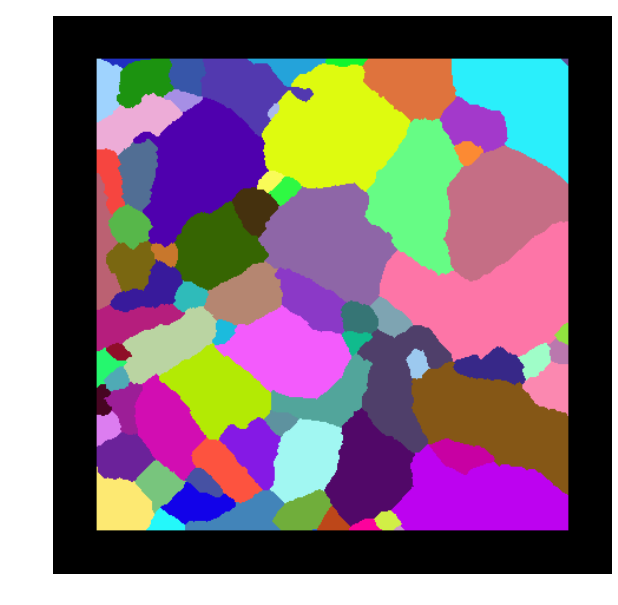

In [472]:
gp.Util.view(rhoana[2],large=True)

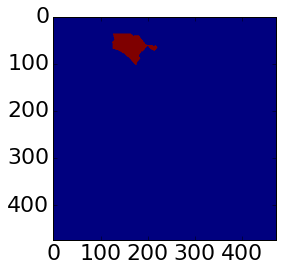

In [475]:
imshow(gp.Util.threshold(rhoana[2],5))

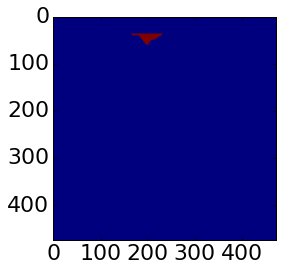

In [474]:
imshow(gp.Util.threshold(rhoana[2],6))

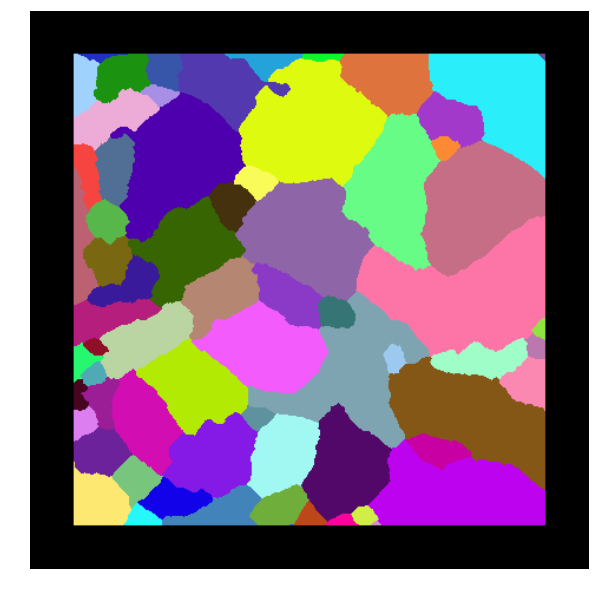

In [276]:
gp.Util.view(gpsim[2],large=True)

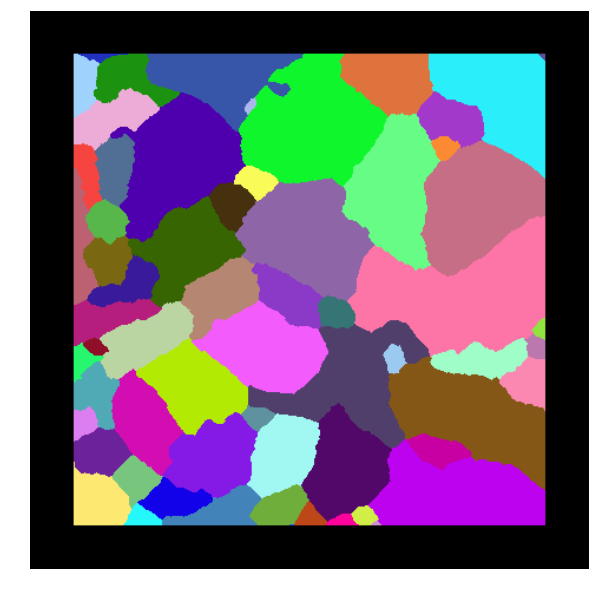

In [277]:
gp.Util.view(fpsim[2],large=True)

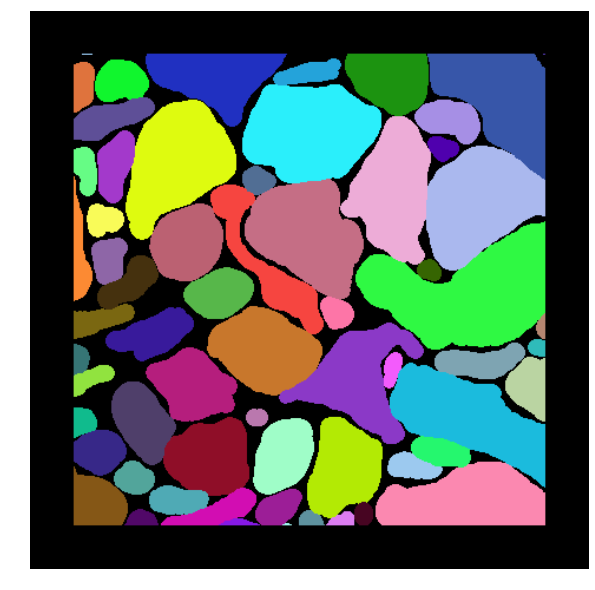

In [278]:
gp.Util.view(gold[2], large=True)

In [282]:
best_vis = []
for z in range(10):
    fixed = gp.Util.propagate_max_overlap(rhoana[z], gold[z])
    fixed = gp.Util.relabel(fixed)
    best_vis.append(gp.Util.vi(fixed.astype(np.uint64),gold[z].astype(np.uint64)))

In [284]:
np.median(best_vis)

0.33414926373414477

In [562]:
best_vis = []
for z in range(50):
    fixed = gp.Util.propagate_max_overlap(c_rhoana[z], c_gold[z])
    fixed = gp.Util.relabel(fixed)
    best_vis.append(gp.Util.vi(fixed.astype(np.uint64),c_gold[z].astype(np.uint64)))

In [563]:
np.median(best_vis)

0.27683609273291143

In [226]:
len(simuser_corrections)

1464

In [236]:
len(simuser_vis)

202

In [231]:
np.median(init_vi_per_slice), np.median(simuser_vis)

(0.4763612343909136, 0.4763612343909136)

In [96]:
simuser_output.shape

(10, 474, 474)

In [118]:
simuser_corrections

[('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('merge', 'current'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', 'current'),
 ('split', 'current'),
 ('split', 'current'),
 ('split', '1'),
 ('split', 'current'),
 ('split', '1'),
 ('split', '1'),
 ('split', 'current'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', 'current'),
 ('split', 'current'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'),
 ('split', '1'

In [290]:
fp_vi_per_slice

[0.4376894378238423,
 0.42248790736115477,
 0.418145124855108,
 0.439276876746551,
 0.4712588022861315,
 0.4676127919023316,
 0.5936543082466625,
 0.6188201134113684,
 0.661255030981917,
 0.572448845896355]

In [297]:
np.median(gp_vi_per_slice)

0.45486023885611315

In [298]:
np.median(fp_vi_per_slice)

0.46943579709423155

In [293]:
init_median_vi

0.4763612343909136

In [299]:
init_median_vi - 0.0927095314219

0.38365170296901363

In [206]:
#
#

In [ ]:
#
with open('/home/d/dojo_xp/data/bigM_fp.p', 'rb') as f:
    bigM = pickle.load(f)

corrections = []
rhoana_copy = np.array(rhoana)
for c in fp_corrections[3]:
    bigM_max = -1
    bigM_max_index = None
    bigM_max_z = -1
    for z,m in enumerate(bigM):
        if m.max() > bigM_max:
            bigM_max = m.max()
            bigM_max_indices = np.where(m == bigM_max)
            bigM_max_index = [bigM_max_indices[0][0], bigM_max_indices[1][0]]
            bigM_max_z = z

            
    m = bigM[bigM_max_z]
    new_m = np.array(m)

    label1 = bigM_max_index[0]
    label2 = bigM_max_index[1]
    
    c_rhoana = rhoana_copy[bigM_max_z].copy()

    if c[1] == '1':
        
#         print 'merging', label1, label2
        
        corrections.append([bigM_max_z, label1, label2, gp.Util.view_labels(c_rhoana, [label1, label2], return_it=True)])
        
        c_rhoana[c_rhoana == label2] = label1

        # grab old neighbors of label 2 which are now neighbors of label1
        label2_neighbors = gp.Util.grab_neighbors(c_rhoana, label2)
        for l_neighbor in label2_neighbors:

            if l_neighbor == 0:
                continue

            if label1 == l_neighbor:
                continue
  
            # get old score
            old_score = new_m[label2, l_neighbor]

            label1_neighbor_score = new_m[label1, l_neighbor]

            # and now choose the max of these two
            new_m[label1, l_neighbor] = max(label1_neighbor_score, old_score)
            new_m[l_neighbor, label1] = max(label1_neighbor_score, old_score)


        # label2 does not exist anymore
        new_m[:,label2] = -2
        new_m[label2, :] = -2      

        bigM[bigM_max_z] = new_m
        
        rhoana_copy[bigM_max_z] = c_rhoana.copy()
        
    else:
        pass
#         print 'current'
for c in corrections:

    gp.Util.view(c[3], color=False)

In [ ]:
with open('/home/d/netstatsPAPER/')

In [208]:
aaa = '''#!/bin/bash
#
# add all other SBATCH directives here...
#
#SBATCH -p cox
#SBATCH -n 1 # Number of cores
#SBATCH -N 1 # Ensure that all cores are on one machine
#SBATCH --gres=gpu
#SBATCH --mem=8000
#SBATCH -t 10-12:00
#SBATCH --mail-type=ALL
#SBATCH --mail-user=haehn@seas.harvard.edu
#SBATCH -o /n/home05/haehn/SLURM/gp/out-me_{Z}.txt
#SBATCH -e /n/home05/haehn/SLURM/gp/err-me_{Z}.txt

source new-modules.sh
module load Anaconda/2.5.0-fasrc01
module load gcc/4.9.0-fasrc01

module load cuda/7.5-fasrc01
module load cudnn/7.0-fasrc01

module load opencv/3.0.0-fasrc04

# custom HDF5 lib
export LIBRARY_PATH=/n/home05/haehn/nolearncox/src/hdf5-1.8.17/hdf5/lib:$LIBRARY_PATH
export LD_LIBRARY_PATH=/n/home05/haehn/nolearncox/src/hdf5-1.8.17/hdf5/lib:$LD_LIBRARY_PATH
export CPATH=/n/home05/haehn/nolearncox/src/hdf5-1.8.17/hdf5/include:$CPATH
export FPATH=/n/home05/haehn/nolearncox/src/hdf5-1.8.17/hdf5/include:$FPATH

source /n/home05/haehn/nolearncox/bin/activate

# we are working in TEMP
cd /n/home05/haehn/Projects/gp/
python mergeerrors.py {Z}

# end of program
exit 0;
'''

In [213]:
for yyy in range(250,300):
    bbb = aaa.replace('{Z}', str(yyy))
    with open('../slurm/mergeerrors/'+str(yyy)+'.slurm', 'w') as f:
        f.write(bbb)

In [216]:
with open('/tmp/'+str(yyy)+'.slurm') as f:
        pickle.dump(bbb,f)

IOError: [Errno 9] Bad file descriptor

In [258]:
alist = '''
          75192294       cox 271.slur    haehn PD       0:00      1 (Resources)
          75192315       cox 272.slur    haehn PD       0:00      1 (Priority)
          75192348       cox 273.slur    haehn PD       0:00      1 (Priority)
          75192349       cox 274.slur    haehn PD       0:00      1 (Priority)
          75192350       cox 275.slur    haehn PD       0:00      1 (Priority)
          75192351       cox 276.slur    haehn PD       0:00      1 (Priority)
          75192352       cox 277.slur    haehn PD       0:00      1 (Priority)
          75192353       cox 278.slur    haehn PD       0:00      1 (Priority)
          75192364       cox 279.slur    haehn PD       0:00      1 (Priority)
          75192390       cox 280.slur    haehn PD       0:00      1 (Priority)
          75192398       cox 281.slur    haehn PD       0:00      1 (Priority)
          75192405       cox 282.slur    haehn PD       0:00      1 (Priority)
          75192460       cox 283.slur    haehn PD       0:00      1 (Priority)
          75192481       cox 284.slur    haehn PD       0:00      1 (Priority)
          75192527       cox 285.slur    haehn PD       0:00      1 (Priority)
          75192572       cox 286.slur    haehn PD       0:00      1 (Priority)
          75192583       cox 287.slur    haehn PD       0:00      1 (Priority)
          75192607       cox 288.slur    haehn PD       0:00      1 (Priority)
          75192608       cox 289.slur    haehn PD       0:00      1 (Priority)
          75192609       cox 290.slur    haehn PD       0:00      1 (Priority)
          75192610       cox 291.slur    haehn PD       0:00      1 (Priority)
          75192611       cox 292.slur    haehn PD       0:00      1 (Priority)
          75192622       cox 293.slur    haehn PD       0:00      1 (Priority)
          75192623       cox 294.slur    haehn PD       0:00      1 (Priority)
          75192685       cox 295.slur    haehn PD       0:00      1 (Priority)
          75192686       cox 296.slur    haehn PD       0:00      1 (Priority)
          75192687       cox 297.slur    haehn PD       0:00      1 (Priority)
          75192688       cox 298.slur    haehn PD       0:00      1 (Priority)
          75192699       cox 299.slur    haehn PD       0:00      1 (Priority)
          75192283       cox 270.slur    haehn  R    1:02:43      1 coxgpu01
          75192271       cox 269.slur    haehn  R    1:19:46      1 coxgpu04
          75192260       cox 268.slur    haehn  R    1:19:48      1 coxgpu03
          75192257       cox 267.slur    haehn  R    1:19:49      1 coxgpu01
          75192246       cox 266.slur    haehn  R    1:19:51      1 coxgpu04
          75192235       cox 265.slur    haehn  R    1:19:54      1 coxgpu03
          75192216       cox 264.slur    haehn  R    1:19:58      1 coxgpu01
          75192210       cox 263.slur    haehn  R    1:19:59      1 coxgpu04
          75192191       cox 262.slur    haehn  R    1:20:04      1 coxgpu03
          75192179       cox 260.slur    haehn  R    1:20:07      1 coxgpu04
          75192180       cox 261.slur    haehn  R    1:20:07      1 coxgpu01
          75192122       cox 258.slur    haehn  R    1:20:17      1 coxgpu01
          75192124       cox 259.slur    haehn  R    1:20:17      1 coxgpu03
          75192105       cox 252.slur    haehn  R    1:20:21      1 coxgpu05
          75192107       cox 253.slur    haehn  R    1:20:21      1 coxgpu01
          75192108       cox 254.slur    haehn  R    1:20:21      1 coxgpu02
          75192109       cox 255.slur    haehn  R    1:20:21      1 coxgpu03
          75192110       cox 256.slur    haehn  R    1:20:21      1 coxgpu04
          75192111       cox 257.slur    haehn  R    1:20:21      1 coxgpu05
          75192104       cox 251.slur    haehn  R    1:20:22      1 coxgpu03
          75192093       cox 250.slur    haehn  R    1:20:24      1 coxgpu01

'''

In [259]:
ids = []
nsplit = alist.split('\n')
for n in nsplit:
    lsplit =  n.split(' ')
    for l in lsplit:
        if l =='':
            continue
        else:
            ids.append(l)
            break

In [260]:
for i in ids:
    print 'scancel '+ i

scancel 75192294
scancel 75192315
scancel 75192348
scancel 75192349
scancel 75192350
scancel 75192351
scancel 75192352
scancel 75192353
scancel 75192364
scancel 75192390
scancel 75192398
scancel 75192405
scancel 75192460
scancel 75192481
scancel 75192527
scancel 75192572
scancel 75192583
scancel 75192607
scancel 75192608
scancel 75192609
scancel 75192610
scancel 75192611
scancel 75192622
scancel 75192623
scancel 75192685
scancel 75192686
scancel 75192687
scancel 75192688
scancel 75192699
scancel 75192283
scancel 75192271
scancel 75192260
scancel 75192257
scancel 75192246
scancel 75192235
scancel 75192216
scancel 75192210
scancel 75192191
scancel 75192179
scancel 75192180
scancel 75192122
scancel 75192124
scancel 75192105
scancel 75192107
scancel 75192108
scancel 75192109
scancel 75192110
scancel 75192111
scancel 75192104
scancel 75192093


In [179]:
init_median_vi

0.4763612343909136

In [258]:
    output_folder = '/home/d/netstatsPAPERFP/IPMLB/'


In [259]:
    bigM_dojo_file = output_folder + '/bigM_fp_2D.p'


In [260]:
      with open(bigM_dojo_file, 'rb') as f:
        bigM_dojo = pickle.load(f)

In [ ]:
    bigM_dojo_file = output_folder + '/bigM_fp_2D.p'
